In [26]:
# Tratamento completo dos dados de ocorrências aeronáuticas

import pandas as pd
import numpy as np
import unicodedata
import seaborn as sns

In [27]:
# Carregar os dados (assume que estão no mesmo diretório)
dt = pd.read_csv('ocorrencias_tratado.csv')

In [28]:
# 1. Verificação de valores ausentes
missing_values = dt.isnull().sum().sort_values(ascending=False)
print("\nValores ausentes:\n", missing_values[missing_values > 0])


Valores ausentes:
 divulgacao_dia_publicacao    10677
ocorrencia_hora                  2
dtype: int64


In [29]:
# 2. Preenchimento de colunas categóricas com "Não Informado"
colunas_categoricas = [
    'ocorrencia_classificacao', 'ocorrencia_uf', 'ocorrencia_pais',
    'ocorrencia_aerodromo', 'investigacao_aeronave_liberada',
    'investigacao_status', 'divulgacao_relatorio_numero'
]

for col in colunas_categoricas:
    dt[col] = dt[col].fillna('Não Informado')

In [30]:
# 3. Tratamento da coluna 'ocorrencia_hora'
def extrair_hora(valor):
    try:
        h, m = valor.split(':')
        return int(h)
    except:
        return np.nan

dt['hora'] = dt['ocorrencia_hora'].apply(extrair_hora)
dt['hora'] = dt['hora'].fillna(-1).astype(int)  # -1 para desconhecido

In [31]:
# 4. Preenchimento de latitude/longitude com média por UF
dt['ocorrencia_latitude'] = dt.groupby('ocorrencia_uf')['ocorrencia_latitude'].transform(
    lambda x: x.fillna(x.mean())
)
dt['ocorrencia_longitude'] = dt.groupby('ocorrencia_uf')['ocorrencia_longitude'].transform(
    lambda x: x.fillna(x.mean())
)


In [32]:
# 5. Normalização de texto para colunas categóricas
def normalizar_texto(texto):
    if isinstance(texto, str):
        texto = texto.strip().lower()
        texto = unicodedata.normalize('NFKD', texto).encode('ASCII', 'ignore').decode('utf-8')
    return texto

for col in colunas_categoricas:
    dt[col] = dt[col].apply(normalizar_texto)

In [33]:

# 6. Criação de colunas derivadas
# Investigacao finalizada (1) ou não (0)
dt['investigacao_finalizada'] = dt['investigacao_status'].apply(
    lambda x: 1 if 'final' in x else 0
)

# Periodo do dia com base na hora
def categorizar_hora(h):
    if h == -1: return 'desconhecido'
    elif h < 6: return 'madrugada'
    elif h < 12: return 'manha'
    elif h < 18: return 'tarde'
    else: return 'noite'

dt['periodo_dia'] = dt['hora'].apply(categorizar_hora)


In [34]:
# 7. Salvar dataset tratado
import os
os.makedirs("dados_tratados", exist_ok=True)
dt.to_csv("dados_tratados/ocorrencias_tratado.csv", index=False)

print("\nTratamento finalizado. Arquivo salvo em: dados_tratados/ocorrencias_tratado.csv")



Tratamento finalizado. Arquivo salvo em: dados_tratados/ocorrencias_tratado.csv


<Axes: xlabel='ocorrencia_longitude', ylabel='ocorrencia_latitude'>

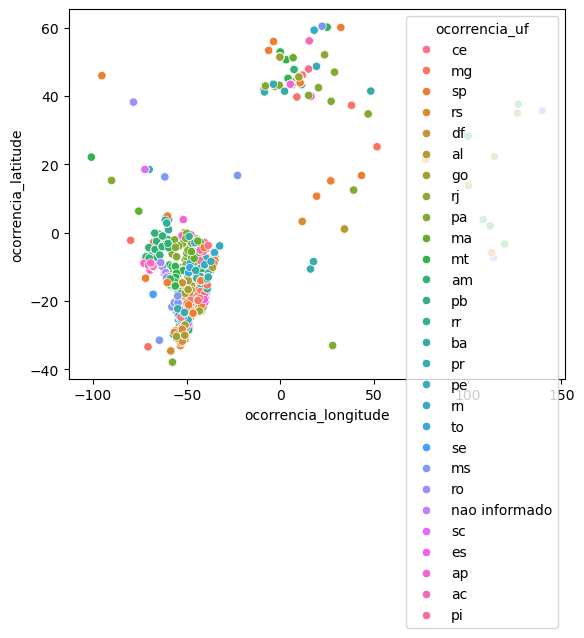

In [35]:
sns.scatterplot(data=dt, x='ocorrencia_longitude', y='ocorrencia_latitude', hue='ocorrencia_uf')

In [38]:
sns.barplot(x=ocorrencias_por_uf.index, y=ocorrencias_por_uf.values)

NameError: name 'ocorrencias_por_uf' is not defined

<Axes: xlabel='ocorrencia_longitude', ylabel='ocorrencia_latitude'>

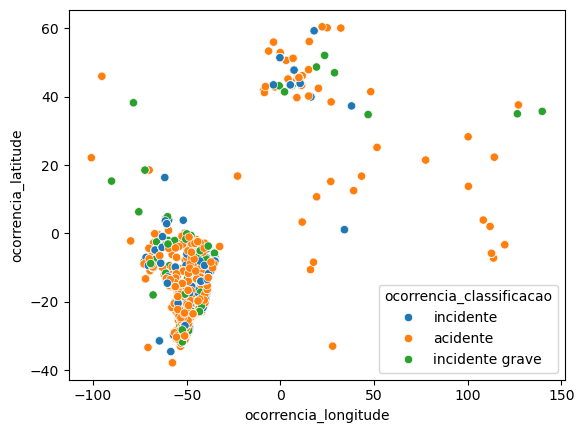

In [39]:
sns.scatterplot(data=dt, x='ocorrencia_longitude', y='ocorrencia_latitude', hue='ocorrencia_classificacao')

In [40]:
sns.kdeplot(x=subset['ocorrencia_longitude'], y=subset['ocorrencia_latitude'], fill=True)

NameError: name 'subset' is not defined

In [41]:
sns.kdeplot(x=subset['ocorrencia_longitude'], y=subset['ocorrencia_latitude'], fill=True)

NameError: name 'subset' is not defined

In [42]:
folium.Map(location=[-15.7797, -47.9297], zoom_start=4)

NameError: name 'folium' is not defined